# Content

Latest version of the algorithm applied to Arylation of Meldrum’s acid and of
Barbituric acid. With some intermidiate visualization too

In [ ]:
#helper function for visualization
def visualize_plate_mixture(array, title = None):

  fig, ax = plt.subplots(figsize=(10, 6))
  cax = ax.imshow(array, aspect='auto')

  # Add colorbar
  fig.colorbar(cax, ax=ax)

  # Add titles
  if title is None:
    ax.set_title("Custom Visualization")
  else:
    ax.set_title(title)


  # Add x and y labels
  ax.set_ylabel('Solvents/bases')
  ax.set_xlabel('Experiment')

  # names = ['mixture 1', 'mixture 2', 'mixture 3', 'mixture 4', 'mixture 5', 'mixture 6', 'mixture 7',  'mixture 8', 'mixture 9', 'mixture 10', 'mixture 11', 'mixture 12'  ]
  ax.set_xticks(np.arange(array.shape[1]))
  # ax.set_xticklabels(names, rotation=90)

  #write the values of the array inside the array itslelf in white
  for i in range(len(array)):
    for j in range(len(array[0])):
      ax.text(j, i, round(array[i, j], 2), ha="center", va="center", color="white")


  plt.show()

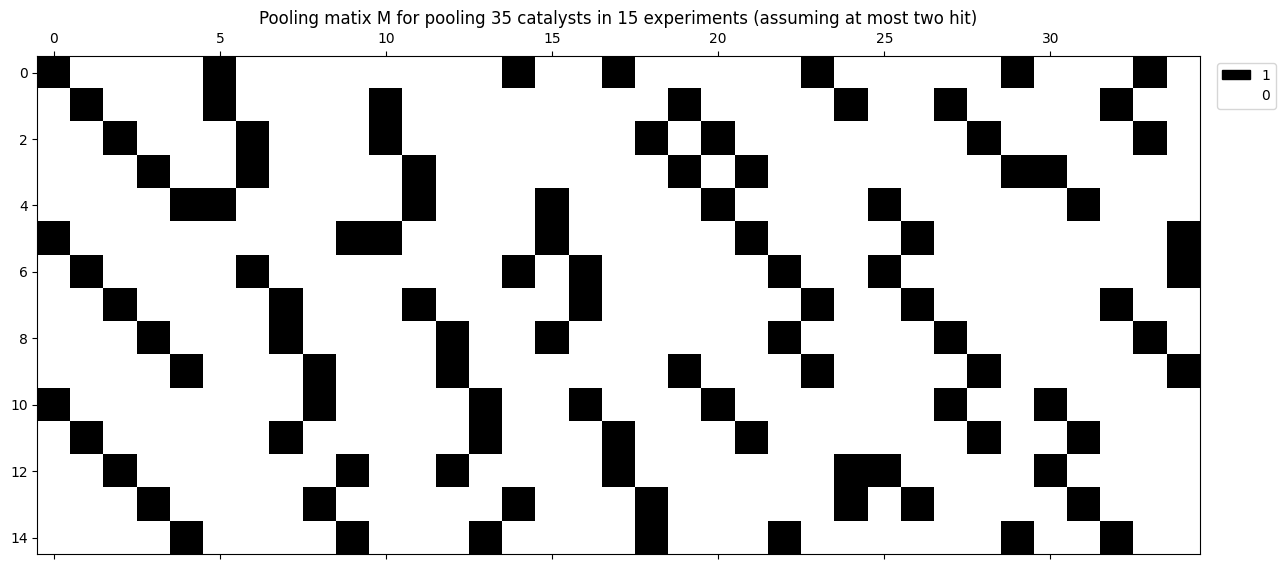



number 0 is assigned to meCgPPh
number 1 is assigned to TrixiePhos
number 2 is assigned to P(oTol)_3
number 3 is assigned to RuPhos
number 4 is assigned to RockPhos
number 5 is assigned to VPhos
number 6 is assigned to PPh_3
number 7 is assigned to tBuBrettPhos
number 8 is assigned to CyJohnPhos
number 9 is assigned to CPhos
number 10 is assigned to DPEPhos
number 11 is assigned to AlPhos
number 12 is assigned to Triisobutyl-Phosphatrane
number 13 is assigned to SPhos
number 14 is assigned to XantPhos
number 15 is assigned to Me3(OMe)-tBuXPhos
number 16 is assigned to Amphos
number 17 is assigned to Jackie CPhos
number 18 is assigned to dppp
number 19 is assigned to Mordal-Phos
number 20 is assigned to Jackie Phos
number 21 is assigned to dppf
number 22 is assigned to P(tBu)_3
number 23 is assigned to GPhos
number 24 is assigned to BINAP
number 25 is assigned to BippyPhos
number 26 is assigned to cataCXlum A
number 27 is assigned to dppdtbpf
number 28 is assigned to QPhos
number 29 i

In [ ]:
#Libraries import
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Preliminary informations (not present in the final code on SpotFire, just for understanding)
#To design the plate

M = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])

# Plot the data with a specified size
fig, ax = plt.subplots(figsize=(15, 8))
cax = ax.matshow(M, cmap='gray_r')

# Create a custom legend
import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', label='1')
white_patch = mpatches.Patch(color='white', label='0')

# Place the legend outside the plot
ax.legend(handles=[black_patch, white_patch], loc='upper center', bbox_to_anchor=(1.04, 1))
plt.title(f"Pooling matix M for pooling {M.shape[1]} catalysts in {M.shape[0]} experiments (assuming at most two hit)")
plt.show()

print("\n")

names = ['meCgPPh', 'TrixiePhos', 'P(oTol)_3','RuPhos', 'RockPhos', 'VPhos', 'PPh_3', 'tBuBrettPhos', 'CyJohnPhos', 'CPhos', 'DPEPhos', 'AlPhos', 'Triisobutyl-Phosphatrane', 'SPhos', 'XantPhos','Me3(OMe)-tBuXPhos', 'Amphos', 'Jackie CPhos' , 'dppp', 'Mordal-Phos', 'Jackie Phos', 'dppf', 'P(tBu)_3','GPhos', 'BINAP','BippyPhos', 'cataCXlum A', 'dppdtbpf', 'QPhos', 'cBridP', 'dtbpf', 'JosiPhosSL J009-1', 'PCy_3', 'XPhos', 'tBuXPhos']

for i, element in enumerate(names):
  print("number", i, "is assigned to", element)

print("\n")

for i in range(15):
  print("experiment", i + 1, "should have cats", [names[j] for j in range(M.shape[1]) if M[i,j] != 0])
print("experiment 16 should have cat IPENT Cl (as representative of the carbines)")

## ELN 425 PLATE 11
No solvent calculation

In [ ]:
pd.read_table('/content/drive/MyDrive/Data/425_Plate_11_new.csv', encoding='utf-16', sep=",")

,AREA_TOTAL_REDUCED_corrected,PLATENUMBER,PlateRow,PlateColumn,Reaction Type,SAMPLENUMBER
0,0.499240,11,B,1,CC-Coupling,1.0
1,1.260331,11,A,1,CC-Coupling,1.0
2,20.596393,11,F,1,CC-Coupling,1.0
3,10.577926,11,G,1,CC-Coupling,1.0
4,69.746333,11,H,1,CC-Coupling,1.0
...,...,...,...,...,...,...
183,2.461107,11,E,12,CC-Coupling,2.0
184,0.925536,11,H,11,CC-Coupling,2.0
185,17.299874,11,G,12,CC-Coupling,2.0
186,2.493577,11,H,12,CC-Coupling,2.0


<ipython-input-4-fdeb1e0aa8ac>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nans['PlateRow'] = df_not_nans['PlateRow'].map(mapping)
<ipython-input-4-fdeb1e0aa8ac>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)


Max Time is: 2
The reshaped plate is:


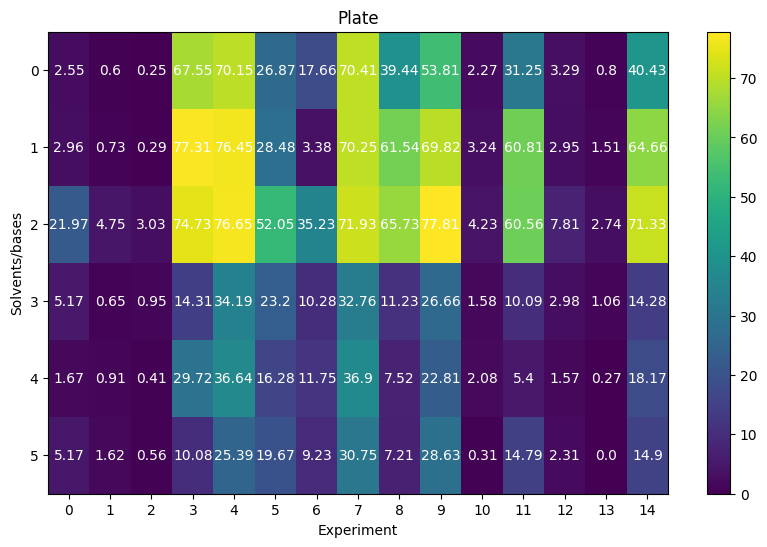

The selected conditions are: [0, 1, 2, 3, 4, 5]
The best two conditions are [2 1]
Status:  optimal
Optimal value of optimization problem 125.94965532973657
Optimal solution [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 21, 22, 23, 26, 27, 28, 29, 30, 32, 33, 34]
Optimal yield [ 0.35558045  0.12798419  1.59672666 26.09666121  0.15219488 18.70214237
  0.3331907   1.40535884  0.13429878 26.21783926  3.38178023  0.41621466
  2.50979338  0.3929075   0.13307173  2.01214223 12.48032097  5.40864344
  4.71940703  0.94573138  0.33407584  0.11904862  2.77172306  0.35283977
  1.02986156  0.14740793  9.8951698 ]
Top 12 hitters ['AlPhos', 'RockPhos', 'tBuBrettPhos', 'dppf', 'tBuXPhos', 'P(tBu)_3', 'GPhos', 'Triisobutyl-Phosphatrane', 'cBridP', 'Me3(OMe)-tBuXPhos', 'Mordal-Phos', 'RuPhos']
With yield [26.217839255550174, 26.096661214496677, 18.702142372631013, 12.480320967385799, 9.895169799431223, 5.408643438365128, 4.719407030530527, 3.3817802273634325, 2.7717230638333628, 2.509793379987

In [ ]:
#Libraries import
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

###########################################
############## PREPROCESSING ##############
###########################################

#data import (substitute the data of the mixed plate in csv format)
data_raw = pd.read_table('/content/drive/MyDrive/Data/425_Plate_11_new.csv', encoding='utf-16', sep=",")


#assuming that all the lines with N.A.s are non-inportant lines where the yield is zero
df_not_nans = data_raw.dropna()

#the column PlateRow has letters from A to H, transform it in numbers form 1 to 8 because needed for indexing
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
df_not_nans['PlateRow'] = df_not_nans['PlateRow'].map(mapping)

#make all the entries of column SAMPLENUMBER of type int
df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)

#Get the maximum number of timepoints present
max_time = np.max(df_not_nans['SAMPLENUMBER'].unique())
print("Max Time is:", max_time)

#initialize array for storing resutls
final_array = np.zeros((8, 12, max_time))

#fill the array with the data
for index, row in df_not_nans.iterrows():
  final_array[row['PlateRow']-1, row['PlateColumn']-1 ,row['SAMPLENUMBER']-1] = row['AREA_TOTAL_REDUCED_corrected']

#time correction: for each condition and each mixture combination, if there is another timepoint with a value different than zero, it uses that.
#This is due to the fact that sometimes we see some yield that at a following timestep disappears, which is not possible of course and is an error of the measuring robot we need to correct for.
for t in range(1,max_time):
  for i in range(final_array.shape[0]):
    for j in range(final_array.shape[1]):
      if final_array[i,j,t] == 0 and final_array[i,j,t-1] != 0:
        final_array[i,j,t] = final_array[i,j,t-1]

#now we can decide to to the max or the average of all timepoints, we decide to do the average
final_array = np.mean(final_array, axis=2)

#reshape the plate for easier manipulation
reshaped_plate = np.concatenate((final_array[:,:6], final_array[:7,6:]), axis=0).T

print("The reshaped plate is:")
visualize_plate_mixture(reshaped_plate, title = "Plate")

#select a tollerance of number of yields that can be differnet from zero across ligands for a given solvent/base condition and select all the conditions that have produced significant yield across all experiments
toll_exp = 6
indices_to_keep = []
for i in range(reshaped_plate.shape[0]):
  if np.sum(reshaped_plate[i,:] > 0) > toll_exp:
    indices_to_keep.append(i)

print("The selected conditions are:", indices_to_keep)

#Select the two condidtions (rows) with higher overall yield
top_four_indices = np.argsort(np.sum(reshaped_plate, axis = 1))[-2:][::-1]
print("The best two conditions are", top_four_indices)

#use average of the signal from all conditions as it is the thing that seems to work the best for now
y_averaged_signal = np.mean(reshaped_plate[indices_to_keep,:], axis=0)


###########################################
################ ALGORITHM ################
###########################################

#The triple Kirkman 15x35 pooling matrix
M = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])

def Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives = set([]), epsilon = 0.1, verbose=False):
  """
  Function that performs compressed sensing using CVXPY.
  """

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)

  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) )
  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  names = ['meCgPPh', 'TrixiePhos', 'P(oTol)_3','RuPhos', 'RockPhos', 'VPhos', 'PPh_3', 'tBuBrettPhos', 'CyJohnPhos', 'CPhos', 'DPEPhos', 'AlPhos', 'Triisobutyl-Phosphatrane', 'SPhos', 'XantPhos','Me3(OMe)-tBuXPhos', 'Amphos', 'Jackie CPhos' , 'dppp', 'Mordal-Phos', 'Jackie Phos', 'dppf', 'P(tBu)_3','GPhos', 'BINAP','BippyPhos', 'cataCXlum A', 'dppdtbpf', 'QPhos', 'cBridP', 'dtbpf', 'JosiPhosSL J009-1', 'PCy_3', 'XPhos', 'tBuXPhos']

  top_hitters_names = [names[i] for i in top_n_hitters]

  if verbose:
    print("Top", n_hit, "hitters", top_hitters_names)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_hitters_names, [x[1] for x in sorted_combined[:n_hit]]

top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY(M, y_averaged_signal, verbose = True, n_hit = 12)

result_final = pd.DataFrame({'Hitters': top_hitters_names, 'Reconstructed Yield': [top_hitters_yields[i] * 7 for i in range(len(top_hitters_yields))]})

In [ ]:
result_final

,Hitters,Reconstructed Yield
0,AlPhos,183.524875
1,RockPhos,182.676629
2,tBuBrettPhos,130.914997
3,dppf,87.362247
4,tBuXPhos,69.266189
5,P(tBu)_3,37.860504
6,GPhos,33.035849
7,Triisobutyl-Phosphatrane,23.672462
8,cBridP,19.402061
9,Me3(OMe)-tBuXPhos,17.568554


-----------
## ELN 424 PLATE 13

In [ ]:
#data import (substitute the data of the mixed plate in csv format)
data_raw = pd.read_table('/content/drive/MyDrive/Data/424_Plate_13_new.csv', encoding='utf-16', sep=",")


#assuming that all the lines with N.A.s are non-inportant lines where the yield is zero
df_not_nans = data_raw.dropna()

In [ ]:
df_not_nans

,ELN_ID,SAMPLE_ID,PLATENUMBER,SAMPLENUMBER,PLATEROW,PLATECOLUMN,COMPOUND,AREA_TOTAL_REDUCED
0,ELN032036-424,MS1-33607-01,13,1,A,1,Product,2.298850
1,ELN032036-424,MS1-33607-01,13,1,A,1,lim SM,18.018455
2,ELN032036-424,MS1-33607-02,13,1,B,1,Product,0.167588
3,ELN032036-424,MS1-33607-02,13,1,B,1,lim SM,33.534440
4,ELN032036-424,MS1-33607-03,13,1,C,1,lim SM,24.663526
...,...,...,...,...,...,...,...,...
364,ELN032036-424,MS1-33611-94,13,2,F,12,lim SM,53.002327
365,ELN032036-424,MS1-33611-95,13,2,G,12,Product,51.677444
366,ELN032036-424,MS1-33611-95,13,2,G,12,lim SM,2.025131
367,ELN032036-424,MS1-33611-96,13,2,H,12,Product,9.193798


In [ ]:
SM_dataframe = df_not_nans[(df_not_nans["COMPOUND"] == "lim SM") | (df_not_nans["COMPOUND"] == "other SM")]
SM_dataframe

,ELN_ID,SAMPLE_ID,PLATENUMBER,SAMPLENUMBER,PLATEROW,PLATECOLUMN,COMPOUND,AREA_TOTAL_REDUCED
1,ELN032036-424,MS1-33607-01,13,1,A,1,lim SM,18.018455
3,ELN032036-424,MS1-33607-02,13,1,B,1,lim SM,33.534440
4,ELN032036-424,MS1-33607-03,13,1,C,1,lim SM,24.663526
6,ELN032036-424,MS1-33607-04,13,1,D,1,lim SM,5.862316
9,ELN032036-424,MS1-33607-06,13,1,F,1,lim SM,31.626271
...,...,...,...,...,...,...,...,...
360,ELN032036-424,MS1-33611-92,13,2,D,12,lim SM,3.685048
362,ELN032036-424,MS1-33611-93,13,2,E,12,lim SM,26.012313
364,ELN032036-424,MS1-33611-94,13,2,F,12,lim SM,53.002327
366,ELN032036-424,MS1-33611-95,13,2,G,12,lim SM,2.025131


In [ ]:
#make all the entries of column SAMPLENUMBER of type int
df_not_nans['SAMPLENUMBER'] = df_not_nans['SAMPLENUMBER'].astype(int)

#Get the maximum number of timepoints present
max_time = np.max(df_not_nans['SAMPLENUMBER'].unique())
print("Max Time is:", max_time)

Max Time is: 2


In [ ]:
perc_of_vials_with_sm = []
for time in range(1, max_time+1):
  perc_of_vials_with_sm.append(SM_dataframe[SM_dataframe["SAMPLENUMBER"] == time].shape[0] / 96 * 100)

In [ ]:
perc_of_vials_with_sm

[92.70833333333334, 89.58333333333334]

In [ ]:
time_weights = np.array(perc_of_vials_with_sm) / np.sum(perc_of_vials_with_sm)

In [ ]:
#we give more importance to the plates where we have a lot of starting material
time_weights

array([0.50857143, 0.49142857])

In [ ]:
product_df = df_not_nans[df_not_nans["COMPOUND"] == "Product"]

#the column PlateRow has letters from A to H, transform it in numbers form 1 to 8 because needed for indexing
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
product_df['PLATEROW'] = product_df['PLATEROW'].map(mapping)


#initialize array for storing resutls
final_array = np.zeros((8, 12, max_time))

#fill the array with the data
for index, row in product_df.iterrows():
  final_array[row['PLATEROW']-1, row['PLATECOLUMN']-1 ,row['SAMPLENUMBER']-1] = row['AREA_TOTAL_REDUCED']

#time correction: for each condition and each mixture combination, if there is another timepoint with a value different than zero, it uses that.
#This is due to the fact that sometimes we see some yield that at a following timestep disappears, which is not possible of course and is an error of the measuring robot we need to correct for.
for t in range(1,max_time):
  for i in range(final_array.shape[0]):
    for j in range(final_array.shape[1]):
      if final_array[i,j,t] == 0 and final_array[i,j,t-1] != 0:
        final_array[i,j,t] = final_array[i,j,t-1]

<ipython-input-14-e7288d17aa1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['PLATEROW'] = product_df['PLATEROW'].map(mapping)


In [ ]:
#If there is at least one condition in which the carbine has more than 50% yield, then we should consider this class of Pd-ligands for the follow up screaning
if np.max(final_array[7,6:]) >= 50:
  print("Should consider carbine in the analysis")
else:
  print("Can discard Carbines for follow-up plate ")

Can discard Carbines for follow-up plate 


The reshaped plate is:


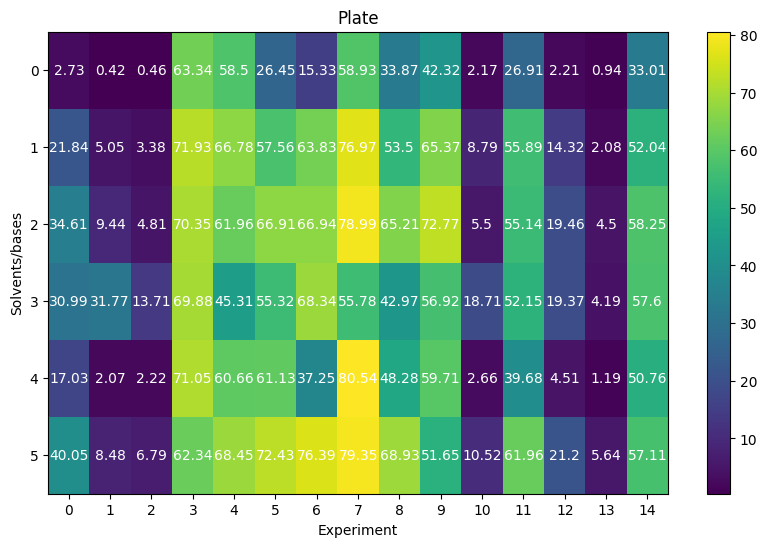

In [ ]:
#now we can decide to to the max or the average of all timepoints, we decide to do the average with weights given by time weights
final_array = np.average(final_array, axis=2, weights=time_weights)

#reshape the plate for easier manipulation
reshaped_plate = np.concatenate((final_array[:,:6], final_array[:7,6:]), axis=0).T

print("The reshaped plate is:")
visualize_plate_mixture(reshaped_plate, title = "Plate")

In [ ]:
#select the minimum number of experiments in which yields should be differnet from zero across ligands for a given solvent/base condition and select all the conditions that have produced significant yield across all experiments
min_non_zero_exp = 6
indices_to_keep = []
for i in range(reshaped_plate.shape[0]):
  col_diff_zero_count = 0
  for j in range(reshaped_plate.shape[1]):
    if reshaped_plate[i,j] > 0:
      col_diff_zero_count += 1
  if col_diff_zero_count > min_non_zero_exp:
    indices_to_keep.append(i)

print("The selected conditions are:", indices_to_keep)

#Select the two condidtions (rows) with higher overall yield
top_four_indices = np.argsort(np.sum(reshaped_plate, axis = 1))[-2:][::-1]
print("The best two conditions are", top_four_indices)

#use average of the signal from all conditions as it is the thing that seems to work the best for now
y_averaged_signal = np.mean(reshaped_plate[indices_to_keep,:], axis=0)

The selected conditions are: [0, 1, 2, 3, 4, 5]
The best two conditions are [5 2]


In [ ]:
###########################################
################ ALGORITHM ################
###########################################

#The triple Kirkman 15x35 pooling matrix
M = np.array([[1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
              [0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1],
              [0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],
              [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0]])

def Compressed_Sensing_CVXPY(M, y, n_hit, true_negatives = set([]), epsilon = 0.1, verbose=False):
  """
  Function that performs compressed sensing using CVXPY.
  """

  ### L1 NORM ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8

  true_neg_indices = list(true_negatives)
  true_neg_indices.sort()

  x_l1 = cp.Variable(shape=n)

  # Setup the problem.
  obj = cp.Minimize( cp.norm(x_l1, 1) )
  if len(true_negatives) > 0:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon, x_l1[true_neg_indices] == 0]
  else:
    constraints = [cp.norm2(y - M @ x_l1) <= epsilon]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  if verbose:
    print("Status: ", prob.status)
    print("Optimal value of optimization problem", obj.value)

  new_possible_hits = [i for i in range(len(x_l1.value)) if x_l1.value[i] >= 0.1]
  if verbose:
    print("Optimal solution", new_possible_hits)
  yield_of_hitters = x_l1.value[new_possible_hits]
  if verbose:
    print("Optimal yield", yield_of_hitters)

  if len(new_possible_hits) <= n_hit:
    return new_possible_hits

  #return the top n new possible hitters in terms of yield
  combined = list(zip(new_possible_hits, yield_of_hitters))
  sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
  top_n_hitters = [x[0] for x in sorted_combined[:n_hit]]

  names = ['meCgPPh', 'TrixiePhos', 'P(oTol)_3','RuPhos', 'RockPhos', 'VPhos', 'PPh_3', 'tBuBrettPhos', 'CyJohnPhos', 'CPhos', 'DPEPhos', 'AlPhos', 'Triisobutyl-Phosphatrane', 'SPhos', 'XantPhos','Me3(OMe)-tBuXPhos', 'Amphos', 'Jackie CPhos' , 'dppp', 'Mordal-Phos', 'Jackie Phos', 'dppf', 'P(tBu)_3','GPhos', 'BINAP','BippyPhos', 'cataCXlum A', 'dppdtbpf', 'QPhos', 'cBridP', 'dtbpf', 'JosiPhosSL J009-1', 'PCy_3', 'XPhos', 'tBuXPhos']

  top_hitters_names = [names[i] for i in top_n_hitters]

  if verbose:
    print("Top", n_hit, "hitters", top_hitters_names)
    print("With yield", [x[1] for x in sorted_combined[:n_hit]] )


  return top_hitters_names, [x[1] for x in sorted_combined[:n_hit]]

top_hitters_names, top_hitters_yields = Compressed_Sensing_CVXPY(M, y_averaged_signal, verbose = True, n_hit = 12)

result_final = pd.DataFrame({'Hitters': top_hitters_names, 'Reconstructed Yield': [top_hitters_yields[i] * 7 for i in range(len(top_hitters_yields))]})

Status:  optimal
Optimal value of optimization problem 195.13680382904664
Optimal solution [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Optimal yield [ 1.27019695  2.05737402  0.75708802  0.4750231  15.21908999  1.18049767
  1.08104683 21.19501768  0.41344313  3.13152879  0.62254307 34.93949372
  3.17834843  1.79191225  0.50984641  5.2468444   2.03417301  2.18855266
  0.35235653  2.18201394  0.5273756  19.89482202 20.31100979 10.11458766
  0.39627083  2.69952516  0.4811353   0.86008749  1.03000133  8.41394394
  1.1347159   0.43820024  2.21334443  0.83501812 25.96037544]
Top 12 hitters ['AlPhos', 'tBuXPhos', 'tBuBrettPhos', 'P(tBu)_3', 'dppf', 'RockPhos', 'GPhos', 'cBridP', 'Me3(OMe)-tBuXPhos', 'Triisobutyl-Phosphatrane', 'CPhos', 'BippyPhos']
With yield [34.939493716400996, 25.960375439763325, 21.19501767746337, 20.311009790551395, 19.89482202009766, 15.21908998538661, 10.114587657156331, 8.4139439372

In [ ]:
result_final

,Hitters,Reconstructed Yield
0,AlPhos,244.576456
1,tBuXPhos,181.722628
2,tBuBrettPhos,148.365124
3,P(tBu)_3,142.177069
4,dppf,139.263754
5,RockPhos,106.533630
6,GPhos,70.802114
7,cBridP,58.897608
8,Me3(OMe)-tBuXPhos,36.727911
9,Triisobutyl-Phosphatrane,22.248439
